In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
data = pd.read_csv('/Users/csuen/radicals/representative regions/UKESM1-0-LL_2010_2014_representative_regions.csv')

In [3]:
data['pt3'] = data['o3prod_mole_stacked'] - data['pt1'] - data['pt2']

data['etoo_eq_mole'] = data['pt3']/data['k18']/data['no_mole']
data['nox_mole'] = data['no_mole']+data['no2_mole']
data['LER'] = data['etoo_eq_mole']/data['nox_mole']

In [4]:
data = data[data['region']!="SGP"]
data = data[data['region']!="VAN"]

In [5]:
LER_region_mean = data.groupby(['region']).mean()['LER']
LER_region_std = data.groupby(['region']).std()['LER']
LER_region_ct = data.groupby(['region']).count()['LER']
LER_region_ste = LER_region_std/np.sqrt(LER_region_ct/5)

In [6]:
LER = pd.DataFrame()

LER['LER_mean'] = LER_region_mean
LER['LER_ste'] = LER_region_ste

LER['ln_LER_mean'] = np.log(LER_region_mean*10**4)

In [7]:
data_sens = pd.read_csv('Fig. 3b SnSv sensitivities scatter plot.csv')

In [8]:
mod = LinearRegression()
X = data_sens[['SnSv_adj']]
y = LER['ln_LER_mean']
mod.fit(X,y)
y_pred = mod.predict(X)
LER['ln_LER_mean_adj'] = LER['ln_LER_mean']*0.36+y_pred*0.64

In [9]:
mod = LinearRegression()
X = LER[['ln_LER_mean_adj']]
y = data_sens['SnSv_adj']
mod.fit(X,y)
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(X)
print(r2_score(y_pred, y))
print(np.sqrt(MSE(y_pred, y)))

[0.4577385]
0.17836904651374313
0.930038226357738
0.2774323063313345


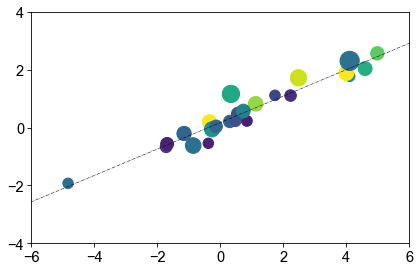

In [ ]:
fig, ax = plt.subplots(figsize=(6.5, 4), dpi=75)
X = LER[['ln_LER_mean_adj']]
y = data_sens['SnSv_adj']
size = data_sens['o3_ppb']
o3net = data_sens['o3net_mole']

x_set = np.arange(-7,7,0.1)
y_set = x_set*mod.coef_+mod.intercept_
plt.plot(x_set, y_set, linestyle='-.', linewidth=0.5, color="black")

plt.scatter(X, y, s=size**1.5, vmin=0, vmax=1.5, c=o3net, cmap="viridis")

#plt.colorbar()
plt.xlim([-6,6])
plt.ylim([-4,4])
plt.yticks([-4,-2,0,2,4], fontsize=14)
plt.xticks([-6,-4,-2,0,2,4,6], fontsize=14)

plt.savefig("Fig. 4e LER-SnSv.pdf", format="pdf", bbox_inches="tight")